In [77]:
from typing import Optional,Any,Literal
import pandas as pd
from sympy import pi,symbols,diff,init_printing,nsimplify,Rational,sympify,substitution,simplify,evalf


# Problema

Un fabricante de botellas desea calcular el diametro D de la base de una botella cónica, dado que tiene un volumen ($V$) deseado y una altura ($h$). Siendo la formula del cono la siguiente:

$$V = \frac{1}{3} \pi (\frac{D}{2})^2 h$$
 

# Datos
## Se proporcionan los siguientes datos

**Volumen deseado (V)** = $1.5x10^{-3}$ $m^3$ 

**Altura de botella (h)** = $0.3m$ 

# Instrucciones

**Se trabajarará con la siguiente función, que se pide como entrada**
$$ f(D) = \frac{1}{3} \pi (\frac{D}{2})^2 h - V$$



In [78]:
#Se pide el valor de la función#
f_D:str = input("Ingresa una funcion en terminos de 3 variables, D,h y V")


In [79]:
#Se convierte el arreglo de caracteres en una funcion simbolica#
f_Ds = sympify(f_D)
f_Ds

# Metodo Newton-Ralphson

Se trabajara con $D_0 = 0.3 m$

Primero definimos las variables simbolicas y además ocuparemos tambien derivar la funcion antes de inicializar las iteraciones

In [80]:
init_printing()
#Se definen las variables simbolicas#
D,h,V = symbols('D h V')
#funcion_volumen = 1/3*pi*(D/2)**2*h-V


Procedemos a derivar la función respecto a $D$

In [81]:
derivada_volumen = diff(f_Ds,D)
derivada_volumen

# Iteraciones

Ahora realizamos el ciclo para obtener el valor del Volmen optimo, manteniendo fijo el valor de $V$ y $h$

- Definimos los valores en arreglos para imprimirlos en una tabla
- Definimos un ciclo while, con un error con el valor real y con el actual, ademas de añadir los valores recopilados de las variables a los arreglos
- Imprimimos la tabla con los resultados

In [82]:
# Valor real
valor_real:float = 0.138


# Arreglos/Listas para la tabla
iteraciones:int = []
valores_xi:list = []
f_x:list = []
f_dx:list = []

Error_vr:list = []
Error_va:list = []


# Input 
**Se solicita un valor inicial con input**


In [83]:
#Se define un valor inicial a Xi
Xi = float(input('Define un valor inicial a Xi'))

**Se solicita una tolerancia**

In [84]:
#Input que convierte el string de la tolerancia en un valor double, o flotante
tolerancia = float(input('Ingresa el valor de la tolerancia Ej.(0.01)'))

In [85]:
def newton_raphson() -> None:
    # Se define Xi con el valor que nos piden (0.3), para saber si ya encontramos el valor que buscamos, 
    # y utilizamos el error tambien
    value = Xi
    iteracion:int = 0
    Er:float|int= 1

    while Er > tolerancia:
        
        #Se agrega una iteracion y se agrega a la lista#
        
        iteracion += 1
        print(iteracion)

        iteraciones.append(iteracion)


        #Se evalua Xi y se agregan a la lista#
        f_xv = f_Ds.subs({D : value,V : 1.5e-3,h : 0.3}).evalf()
        f_x.append(f_xv)

        f_dxv = simplify(derivada_volumen.subs({D:value, h:0.3})).evalf()
        f_dx.append(f_dxv)


        #Se calcula el nuevo valor de Xi y se agrega el valor anterior de Xi a la lista utilizando
        # Newton Raphson 
        valor_anterior = value
        
        valores_xi.append(value)
        
        nuevo_valor = value - (f_xv/f_dxv)
        
        value = nuevo_valor
        
        #Se calcula el error con el valor real y el anterior

        if iteracion > 1:
            #Error con valor anterior
            
            Ea = abs((nuevo_valor - valor_anterior)/nuevo_valor)
            Er = abs((nuevo_valor - valor_real)/valor_real)
        
            Error_va.append(Ea)
            Error_vr.append(Er)

        elif iteracion == 1:
            Error_va.append("None")
            Error_vr.append("None")


        print(f_xv,nuevo_valor)


In [86]:
newton_raphson()

1
0.00556858347057703 0.181830988618379
2
0.00109672333919021 0.143432926338091
3
0.000115799983826888 0.138293202759540


In [87]:
iteraciones

In [88]:
pd.DataFrame({"Iteracion":iteraciones,"Valores Diametro":valores_xi,"Valores f(d)":f_x,"Valores f'(d)":f_dx,"Error v_real":Error_vr,"Error v_anterior":Error_va})

,Iteracion,Valores Diametro,Valores f(d),Valores f'(d),Error v_real,Error v_anterior
0,1,0.3,0.00556858347057703,0.0471238898038469,None,None
1,2,0.181830988618379,0.00109672333919021,0.0285619449019234,0.0393690314354437,0.267707445288945
2,3,0.143432926338091,0.000115799983826888,0.0225303913833317,0.00212465767782895,0.0371654099839427


In [89]:
import seaborn as sb
import matplotlib.pyplot as plt

In [90]:
df = pd.DataFrame({'Iteraciones':iteraciones,'Valores':valores_xi})
df["Iteraciones"] = df["Iteraciones"].astype(float)
df["Valores"] = df["Valores"].astype(float)


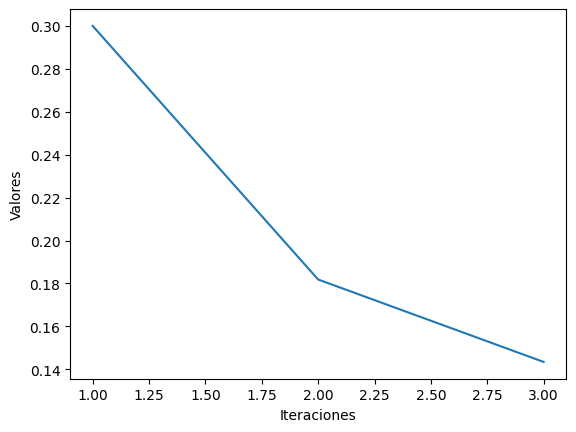

In [91]:
sb.lineplot(x='Iteraciones',y = 'Valores',data= df)
plt.show()

# Metodo de la Secante 

**Se define a continuacion la función que utiliza la secante como método**

Se almacenan los datos en el siguiente arreglo

In [ ]:
iteraciones_secante:list = []
valores_xi_sec:list = []
f_x_secante:list =[]
f_dx_secante:list = []

Error_vr_secante:list = []
Error_va_secante:list = []


In [ ]:
def secante() -> None:
    value = Xi
    iteracion:int = 0
    Er:float|int = 1

    while Er > tolerancia:

        #Se agrega una iteracion y se agrega a la lista#
        iteracion += 1
        print(iteracion)

        iteraciones_secante.append(iteracion)

        # Se evalua Xi y se agrega a la lista #
        


